# Blob Filter

# Laplacian of Gaussian

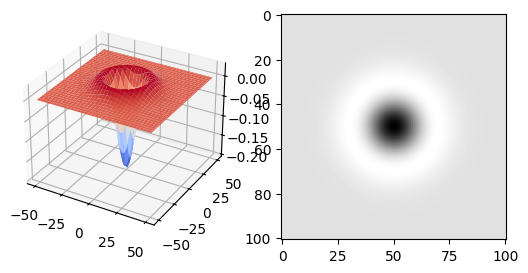

In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# Define parameters for a 2D Gaussian function
sigma=10
hw=50

# Create a grid of x and y values
x = np.linspace(-hw, hw, 2*hw+1)
y = np.linspace(-hw, hw, 2*hw+1)
X, Y = np.meshgrid(x, y)

# Calculate the Gaussian function
G = 1 / (2 * np.pi) * np.exp(-(X**2 + Y**2) / (2 * sigma**2))

# Compute partial derivatives using Sobel operators
Gx = cv.Sobel(G, cv.CV_64F, 1, 0)      # cv.Sobel(): Computes the gradient
Gy = cv.Sobel(G, cv.CV_64F, 0, 1)
Gxx = cv.Sobel(Gx, cv.CV_64F, 1, 0)
Gyy = cv.Sobel(Gy, cv.CV_64F, 0, 1)

# Laplacian of the Gaussian
L = Gxx + Gyy

# Create a 3D plot
fig = plt.figure()
ax = fig.add_subplot(121, projection='3d')
ax.plot_surface(X, Y, L, cmap='coolwarm')
ax=fig.add_subplot(122)
ax.imshow(L, cmap='gray')
plt.show()


# Canny Edge Detector

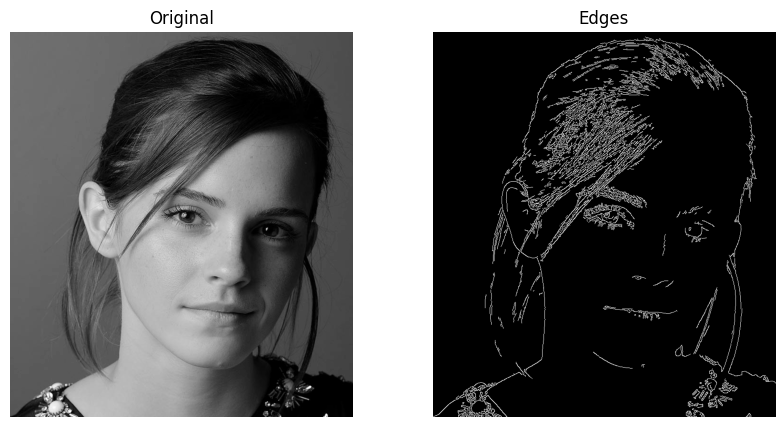

In [ ]:
# Canny Edges
import cv2 as cv

im = cv.imread('emma/emma.jpg', cv.IMREAD_GRAYSCALE)
assert im is not None

# Apply Canny edge detection
# The thresholds are 100 (lower) and 200 (upper) for edge detection
edges = cv.Canny(im, 100, 200)   
# 100: Lower threshold for edge detection. Pixels with gradient values below this threshold are not considered edges.
# 200: Upper threshold for edge detection. Pixels with gradient values above this threshold are considered edges.

# Set up a figure with 2 subplots side-by-side
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

# Display the original grayscale image in the first subplot
ax[0].imshow(im, cmap='gray')
ax[0].set_title('Original')  
ax[0].axis('off')  

# Display the edges detected by the Canny edge detector in the second subplot
ax[1].imshow(edges, cmap='gray')
ax[1].set_title('Edges')  
ax[1].axis('off')  

# Show the figure with the two subplots
plt.show()

# Canny Edge Detector with trackbar

In [ ]:
import cv2 as cv
import numpy as np
import math

# Maximum value for high threshold
hi_threshold_max = 255
# Window title for the Canny edge detection display
title_window = r'Canny'
# Initial ratio of low threshold to high threshold
ratio = 0.3
# Initial high threshold value
hi_threshold = 255
# Compute the initial low threshold based on the ratio
low_threshold = math.floor(hi_threshold * ratio)

def on_trackbar(val):
    """
    Callback function for trackbars to update the Canny edge detection parameters
    and display the edges with updated thresholds.
    """
    # Get the current high threshold value from the trackbar
    hi_threshold = cv.getTrackbarPos(trackbar1_name, title_window)
    # Get the current ratio for the low threshold from the trackbar
    ratio = cv.getTrackbarPos(trackbar2_name, title_window) / 100.0
    # Calculate the low threshold based on the high threshold and ratio
    low_threshold = hi_threshold * ratio
    # Apply Canny edge detection with the updated thresholds
    edges = cv.Canny(im, low_threshold, hi_threshold)
    # Display the edge-detected image in the window
    cv.imshow(title_window, edges)

# Load the input image in color mode
im = cv.imread('emma/emma.jpg', cv.IMREAD_COLOR)
if im is None:
    print("Could not open or find the image.")
    exit(code=0)

# Create a named window for displaying the results
cv.namedWindow(title_window)
# Create a trackbar for adjusting the high threshold value
trackbar1_name = r'High Threshold Value'
cv.createTrackbar(trackbar1_name, title_window, hi_threshold, hi_threshold_max, on_trackbar)
# Create a trackbar for adjusting the low threshold percentage
trackbar2_name = r'Low Threshold %'
cv.createTrackbar(trackbar2_name, title_window, 1, 100, on_trackbar)
# Initialize the trackbars and display the initial edge-detected image
on_trackbar(hi_threshold)
# Wait indefinitely until a key is pressed
cv.waitKey()
# Destroy all OpenCV windows
cv.destroyAllWindows()


error: OpenCV(4.10.0) D:\a\opencv-python\opencv-python\opencv\modules\highgui\src\window.cpp:868: error: (-215:Assertion failed) trackbar in function 'cv::getTrackbarPos'
